In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as T
from common import train_gen_network, get_digit_dataset, get_fashion_dataset
from diffusion_model import DiffusionLatentModel
from common import plot_digit_imgs
import os
result_dir = 'results'
if not(os.path.exists(result_dir)):
    os.mkdir(result_dir)

In [2]:
IMG_SIZE = 12
DIM = IMG_SIZE*IMG_SIZE
NUM_STEPS = 8
HIDDEN_DIM = 512
LEARNING_RATE = 1e-3
EPOCH = 2000
BATCH_SIZE = 64
MAX_PATIENCE = 80
BETAS=(1e-4, 0.9)
plot_func = lambda x: plot_digit_imgs(x, IMG_SIZE, (4, 4))

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
transform = T.Lambda(lambda x: torch.flatten(x*2.0-1.0)) # scaled [-1. ~ 1.]
dataset = get_digit_dataset(IMG_SIZE, None, transform)
val_len = int(len(dataset)*0.05)
train_dataset, val_dataset = random_split(dataset, [len(dataset) - val_len, val_len])
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

In [5]:
# Model
def p_net():
    return nn.Sequential(
        nn.Linear(DIM, HIDDEN_DIM*2), nn.LeakyReLU(),
        nn.Linear(HIDDEN_DIM*2, HIDDEN_DIM*2), nn.LeakyReLU(),
        nn.Linear(HIDDEN_DIM*2, HIDDEN_DIM), nn.LeakyReLU(),
        nn.Linear(HIDDEN_DIM, DIM*2)
    )


def decode_net():
    return nn.Sequential(
        nn.Linear(DIM, HIDDEN_DIM*2),
        nn.Linear(HIDDEN_DIM*2, HIDDEN_DIM*2),
        nn.Linear(HIDDEN_DIM*2, HIDDEN_DIM),
        nn.Linear(HIDDEN_DIM, DIM), nn.Tanh(),
    )


model = DiffusionLatentModel(DIM, NUM_STEPS, p_net, decode_net, betas=BETAS)
optimizer = torch.optim.Adamax(model.parameters(), LEARNING_RATE)

Epoch:   0%|          | 0/2000 [00:00<?, ?it/s]

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1 - val_loss=55011.607421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 2 - val_loss=53124.94921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 3 - val_loss=52087.654296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 4 - val_loss=51284.453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 5 - val_loss=50273.818359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 6 - val_loss=49130.359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 7 - val_loss=48773.6640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 8 - val_loss=48283.955078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 9 - val_loss=47948.03125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 10 - val_loss=47404.419921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 11 - val_loss=46407.77734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 12 - val_loss=46621.05078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 13 - val_loss=45563.140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 14 - val_loss=45103.240234375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 15 - val_loss=44926.345703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 16 - val_loss=45939.798828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 17 - val_loss=45360.169921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 18 - val_loss=45554.9375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 19 - val_loss=44514.296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 20 - val_loss=43618.607421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 21 - val_loss=44375.3115234375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 22 - val_loss=43593.046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 23 - val_loss=43662.9921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 24 - val_loss=44038.78515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 25 - val_loss=44377.509765625


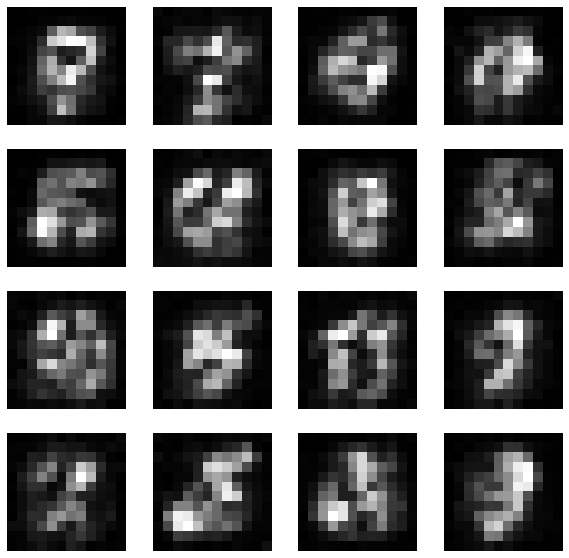

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 26 - val_loss=43056.0078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 27 - val_loss=43221.2919921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 28 - val_loss=44216.7783203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 29 - val_loss=43513.349609375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 30 - val_loss=44985.3359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 31 - val_loss=43033.2236328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 32 - val_loss=42512.8134765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 33 - val_loss=42589.3359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 34 - val_loss=43610.9267578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 35 - val_loss=42344.1591796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 36 - val_loss=43631.873046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 37 - val_loss=43344.8203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 38 - val_loss=42619.8056640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 39 - val_loss=43049.708984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 40 - val_loss=43429.1181640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 41 - val_loss=41979.8154296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 42 - val_loss=42602.2041015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 43 - val_loss=42551.9609375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 44 - val_loss=42957.640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 45 - val_loss=42626.9453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 46 - val_loss=42018.7119140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 47 - val_loss=42182.0107421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 48 - val_loss=43539.275390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 49 - val_loss=43718.61328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 50 - val_loss=41977.4091796875


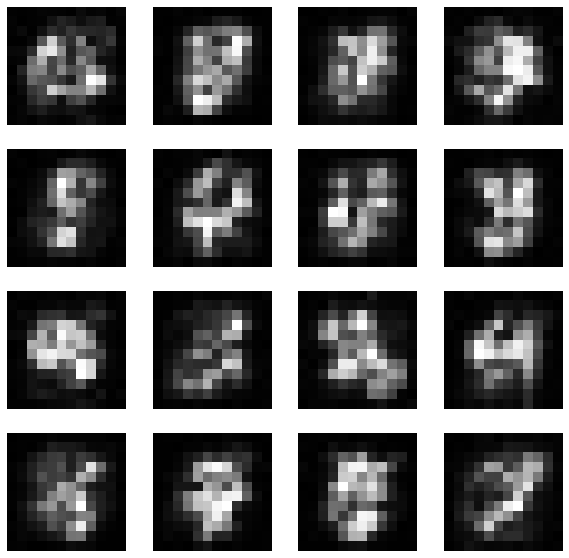

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 51 - val_loss=42797.8408203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 52 - val_loss=41965.208984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 53 - val_loss=42017.9228515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 54 - val_loss=42180.5908203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 55 - val_loss=41227.048828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 56 - val_loss=41734.4208984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 57 - val_loss=42569.2197265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 58 - val_loss=41450.0166015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 59 - val_loss=41587.7216796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 60 - val_loss=41352.00390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 61 - val_loss=41251.9462890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 62 - val_loss=41789.193359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 63 - val_loss=41358.9716796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 64 - val_loss=42161.626953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 65 - val_loss=42862.77734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 66 - val_loss=42910.3623046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 67 - val_loss=42533.578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 68 - val_loss=41344.6611328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 69 - val_loss=41178.1376953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 70 - val_loss=41337.35546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 71 - val_loss=40652.080078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 72 - val_loss=41184.1513671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 73 - val_loss=41032.337890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 74 - val_loss=40940.8662109375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 75 - val_loss=41656.1875


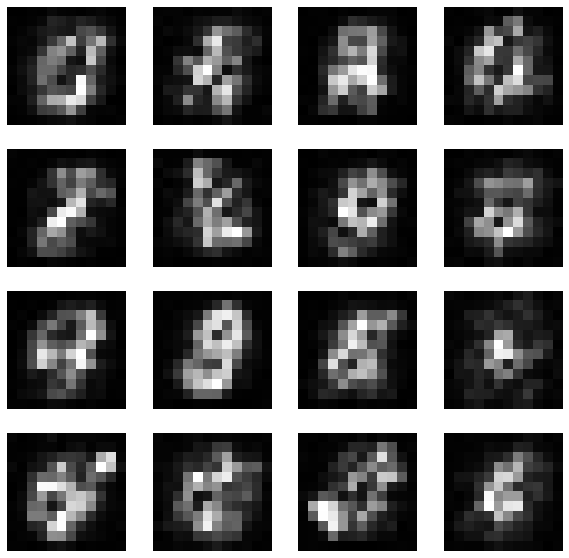

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 76 - val_loss=43430.263671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 77 - val_loss=41047.810546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 78 - val_loss=41127.5390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 79 - val_loss=40703.7724609375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 80 - val_loss=41049.751953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 81 - val_loss=40747.5576171875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 82 - val_loss=40588.896484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 83 - val_loss=41610.259765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 84 - val_loss=40926.5244140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 85 - val_loss=40931.7431640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 86 - val_loss=41196.732421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 87 - val_loss=40926.3759765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 88 - val_loss=40967.7177734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 89 - val_loss=40912.4970703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 90 - val_loss=40303.693359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 91 - val_loss=40490.0048828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 92 - val_loss=40323.591796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 93 - val_loss=40385.5009765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 94 - val_loss=40940.904296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 95 - val_loss=40839.9072265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 96 - val_loss=40433.9453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 97 - val_loss=40734.0478515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 98 - val_loss=40705.7509765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 99 - val_loss=40374.966796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 100 - val_loss=40726.970703125


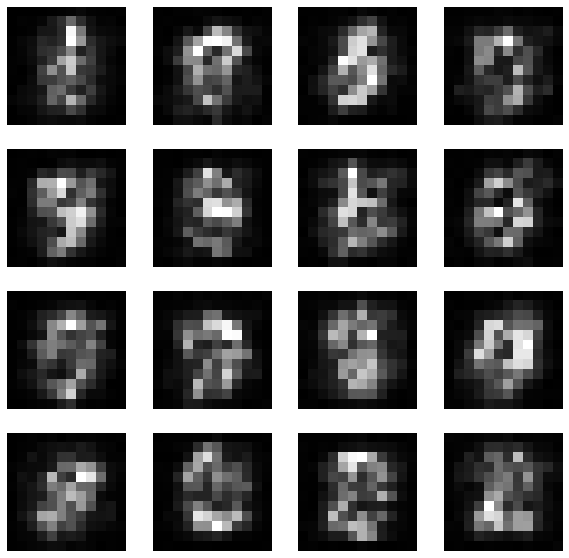

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 101 - val_loss=40283.7138671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 102 - val_loss=40164.7607421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 103 - val_loss=40036.4814453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 104 - val_loss=40860.9658203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 105 - val_loss=40552.96484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 106 - val_loss=40028.7734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 107 - val_loss=40249.919921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 108 - val_loss=40245.6474609375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 109 - val_loss=40109.3212890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 110 - val_loss=40146.2783203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 111 - val_loss=39889.0341796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 112 - val_loss=39518.5322265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 113 - val_loss=40270.34375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 114 - val_loss=40169.3095703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 115 - val_loss=41445.013671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 116 - val_loss=40092.5869140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 117 - val_loss=40893.6640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 118 - val_loss=39701.63671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 119 - val_loss=39699.5341796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 120 - val_loss=42228.9501953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 121 - val_loss=40145.7392578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 122 - val_loss=39865.626953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 123 - val_loss=40248.9033203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 124 - val_loss=39888.6376953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 125 - val_loss=43703.1337890625


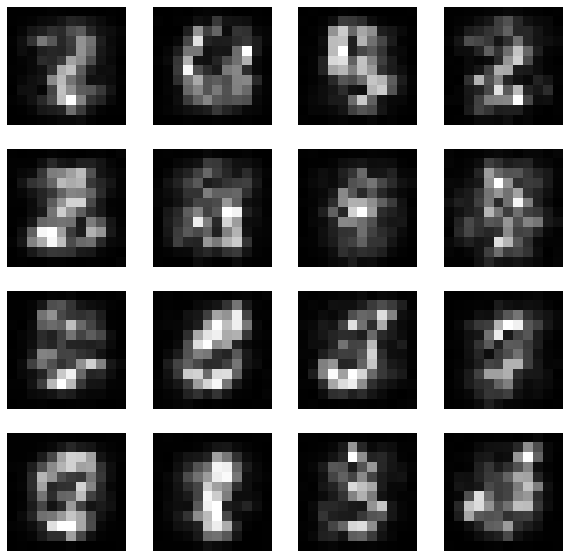

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 126 - val_loss=39633.732421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 127 - val_loss=39425.0654296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 128 - val_loss=40767.59765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 129 - val_loss=39155.1953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 130 - val_loss=39819.95703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 131 - val_loss=39963.5927734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 132 - val_loss=41955.0205078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 133 - val_loss=39406.771484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 134 - val_loss=39198.296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 135 - val_loss=39570.337890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 136 - val_loss=40407.3984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 137 - val_loss=39822.1767578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 138 - val_loss=40385.0712890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 139 - val_loss=39106.3603515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 140 - val_loss=42433.7646484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 141 - val_loss=39847.462890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 142 - val_loss=39200.0


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 143 - val_loss=39175.1083984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 144 - val_loss=40866.8935546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 145 - val_loss=39366.240234375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 146 - val_loss=39218.2392578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 147 - val_loss=40178.2919921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 148 - val_loss=39715.326171875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 149 - val_loss=39325.626953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 150 - val_loss=39815.970703125


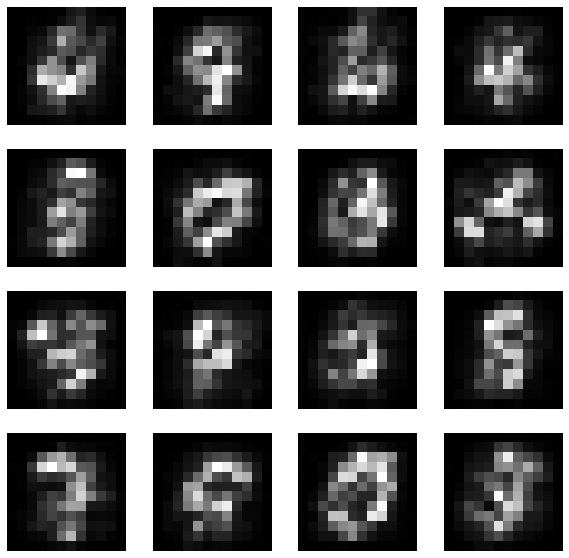

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 151 - val_loss=40182.5673828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 152 - val_loss=40013.09375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 153 - val_loss=39269.4365234375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 154 - val_loss=39121.142578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 155 - val_loss=39598.1259765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 156 - val_loss=39004.2783203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 157 - val_loss=39078.427734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 158 - val_loss=39110.33203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 159 - val_loss=41033.2109375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 160 - val_loss=39955.2392578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 161 - val_loss=39351.7744140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 162 - val_loss=39707.7509765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 163 - val_loss=39142.3544921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 164 - val_loss=41745.6630859375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 165 - val_loss=39542.6220703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 166 - val_loss=39083.68359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 167 - val_loss=40265.2861328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 168 - val_loss=38974.509765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 169 - val_loss=39409.0751953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 170 - val_loss=39439.4384765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 171 - val_loss=39144.3486328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 172 - val_loss=39663.546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 173 - val_loss=39048.3857421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 174 - val_loss=39076.8740234375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 175 - val_loss=40892.50390625


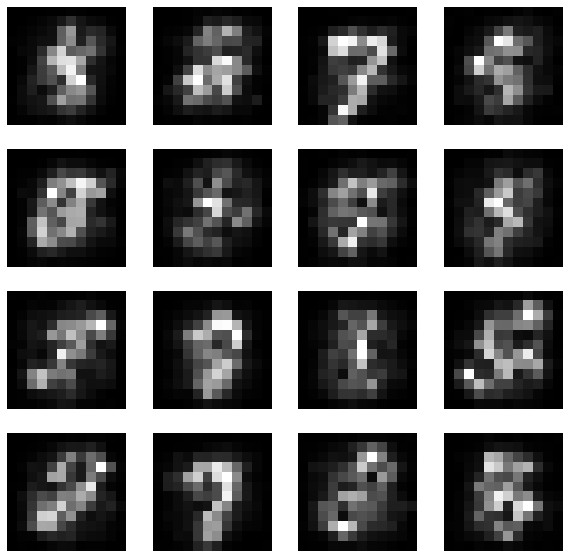

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 176 - val_loss=39457.8408203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 177 - val_loss=39120.056640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 178 - val_loss=39089.375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 179 - val_loss=38475.5302734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 180 - val_loss=40855.2216796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 181 - val_loss=38796.4921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 182 - val_loss=38619.6357421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 183 - val_loss=39306.9755859375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 184 - val_loss=38854.9267578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 185 - val_loss=39597.1416015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 186 - val_loss=38731.50390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 187 - val_loss=39218.9208984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 188 - val_loss=41128.9609375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 189 - val_loss=38564.251953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 190 - val_loss=38536.236328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 191 - val_loss=38961.6494140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 192 - val_loss=44621.2705078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 193 - val_loss=38378.1591796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 194 - val_loss=39820.1025390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 195 - val_loss=38630.1826171875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 196 - val_loss=38394.9306640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 197 - val_loss=38600.140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 198 - val_loss=40724.01171875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 199 - val_loss=38535.1220703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 200 - val_loss=39236.3134765625


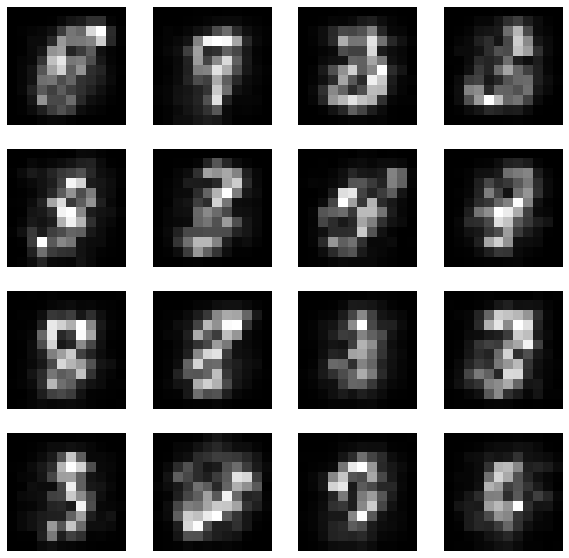

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 201 - val_loss=38564.41015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 202 - val_loss=38553.50390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 203 - val_loss=38256.9404296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 204 - val_loss=39882.7890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 205 - val_loss=38005.275390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 206 - val_loss=38565.6708984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 207 - val_loss=38015.8408203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 208 - val_loss=38376.4052734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 209 - val_loss=39330.7861328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 210 - val_loss=38452.8271484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 211 - val_loss=39590.4267578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 212 - val_loss=38126.2314453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 213 - val_loss=38163.9619140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 214 - val_loss=38023.8505859375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 215 - val_loss=39007.154296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 216 - val_loss=38116.0595703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 217 - val_loss=39241.310546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 218 - val_loss=37888.7763671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 219 - val_loss=37929.86328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 220 - val_loss=39075.6904296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 221 - val_loss=38298.705078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 222 - val_loss=38712.9443359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 223 - val_loss=38560.0126953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 224 - val_loss=38582.59765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 225 - val_loss=38081.837890625


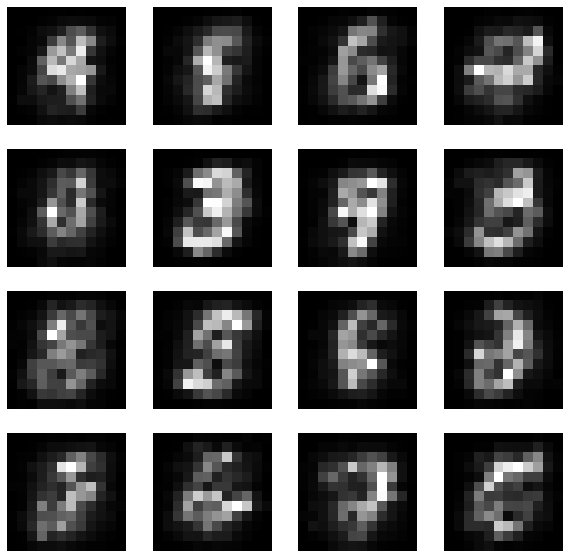

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 226 - val_loss=38022.9462890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 227 - val_loss=38281.0419921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 228 - val_loss=38643.806640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 229 - val_loss=39864.5078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 230 - val_loss=37989.185546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 231 - val_loss=40114.35546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 232 - val_loss=37905.7412109375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 233 - val_loss=38007.7021484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 234 - val_loss=38269.1884765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 235 - val_loss=38056.2685546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 236 - val_loss=38751.2705078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 237 - val_loss=37713.6689453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 238 - val_loss=37959.83984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 239 - val_loss=38175.220703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 240 - val_loss=37900.5166015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 241 - val_loss=37861.9189453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 242 - val_loss=39877.32421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 243 - val_loss=37741.59375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 244 - val_loss=38192.8095703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 245 - val_loss=38184.482421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 246 - val_loss=37751.7568359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 247 - val_loss=38644.83203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 248 - val_loss=38213.3251953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 249 - val_loss=37827.3349609375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 250 - val_loss=38490.7197265625


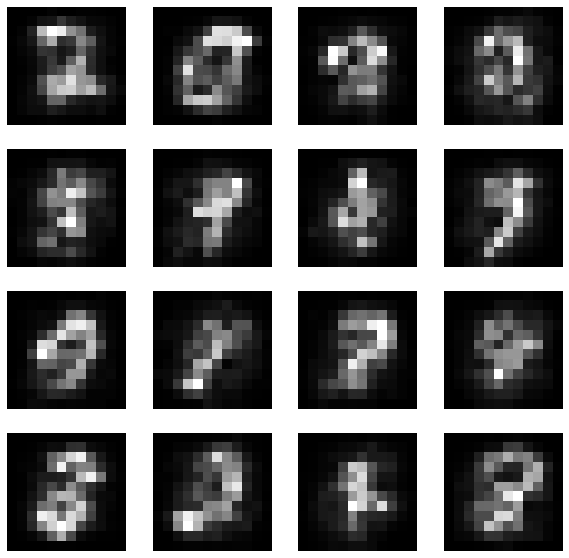

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 251 - val_loss=37872.3603515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 252 - val_loss=37320.5322265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 253 - val_loss=37690.4970703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 254 - val_loss=38483.671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 255 - val_loss=37608.6748046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 256 - val_loss=38678.7685546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 257 - val_loss=37645.7099609375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 258 - val_loss=37568.8388671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 259 - val_loss=38897.5302734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 260 - val_loss=38697.810546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 261 - val_loss=38387.9853515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 262 - val_loss=37715.4501953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 263 - val_loss=41783.8447265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 264 - val_loss=37906.9189453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 265 - val_loss=39072.7646484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 266 - val_loss=37936.0302734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 267 - val_loss=37751.43359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 268 - val_loss=41579.8447265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 269 - val_loss=38048.8740234375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 270 - val_loss=37520.955078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 271 - val_loss=37585.1728515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 272 - val_loss=37358.2666015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 273 - val_loss=37499.2607421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 274 - val_loss=38834.1494140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 275 - val_loss=38222.810546875


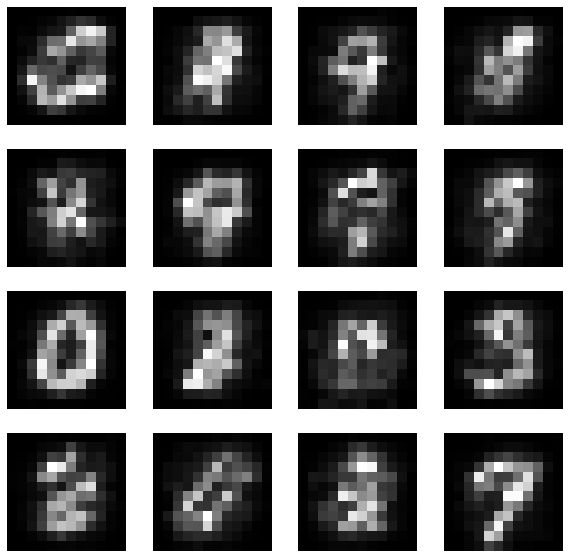

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 276 - val_loss=38729.5615234375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 277 - val_loss=37597.3916015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 278 - val_loss=37984.1513671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 279 - val_loss=38003.4287109375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 280 - val_loss=38464.142578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 281 - val_loss=38837.04296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 282 - val_loss=37944.0830078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 283 - val_loss=37747.7822265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 284 - val_loss=37485.275390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 285 - val_loss=37457.16796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 286 - val_loss=37549.62890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 287 - val_loss=40628.28125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 288 - val_loss=37512.55078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 289 - val_loss=37795.6435546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 290 - val_loss=36749.017578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 291 - val_loss=37963.84765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 292 - val_loss=37566.6396484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 293 - val_loss=37570.3486328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 294 - val_loss=38032.4501953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 295 - val_loss=38340.150390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 296 - val_loss=37261.83203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 297 - val_loss=37162.9912109375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 298 - val_loss=37548.9189453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 299 - val_loss=38283.6259765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 300 - val_loss=36923.341796875


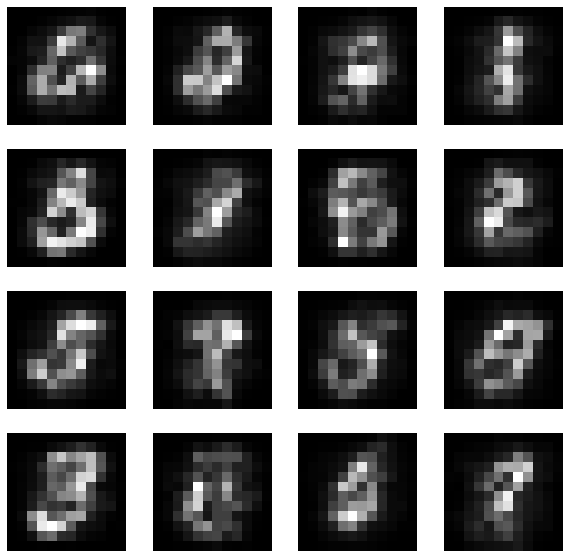

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 301 - val_loss=37299.3466796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 302 - val_loss=37663.4794921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 303 - val_loss=38305.3251953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 304 - val_loss=37366.0458984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 305 - val_loss=37547.5224609375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 306 - val_loss=37328.658203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 307 - val_loss=37430.724609375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 308 - val_loss=36938.3076171875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 309 - val_loss=37502.0986328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 310 - val_loss=37683.01953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 311 - val_loss=36997.2255859375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 312 - val_loss=39081.4892578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 313 - val_loss=37724.0439453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 314 - val_loss=37325.9111328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 315 - val_loss=36917.6513671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 316 - val_loss=37040.5234375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 317 - val_loss=37168.41015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 318 - val_loss=37142.1103515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 319 - val_loss=37163.4169921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 320 - val_loss=37037.2333984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 321 - val_loss=37079.48046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 322 - val_loss=38720.146484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 323 - val_loss=36948.9150390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 324 - val_loss=37570.45703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 325 - val_loss=37210.15234375


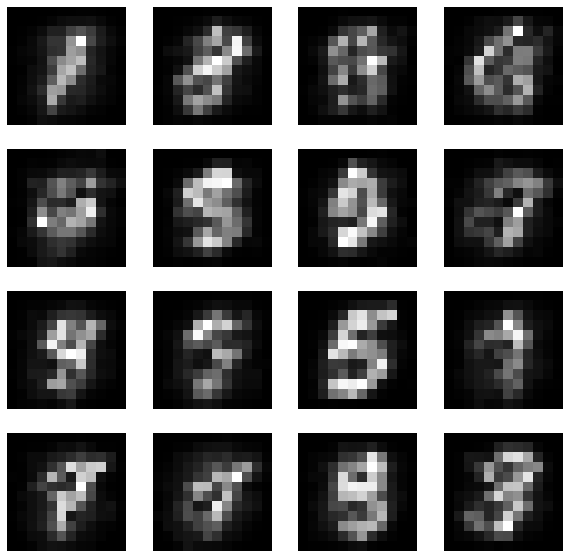

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 326 - val_loss=37305.634765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 327 - val_loss=37135.3916015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 328 - val_loss=37237.7880859375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 329 - val_loss=37664.4423828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 330 - val_loss=36799.6904296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 331 - val_loss=37218.5390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 332 - val_loss=37165.5498046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 333 - val_loss=37081.9921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 334 - val_loss=37513.572265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 335 - val_loss=38369.9716796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 336 - val_loss=39679.7861328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 337 - val_loss=36860.83203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 338 - val_loss=38000.6923828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 339 - val_loss=37071.7421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 340 - val_loss=37137.771484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 341 - val_loss=36725.6279296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 342 - val_loss=37633.595703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 343 - val_loss=36872.470703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 344 - val_loss=38417.9189453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 345 - val_loss=36581.0810546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 346 - val_loss=37091.7412109375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 347 - val_loss=38821.0048828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 348 - val_loss=36929.5869140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 349 - val_loss=36999.0322265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 350 - val_loss=36675.8046875


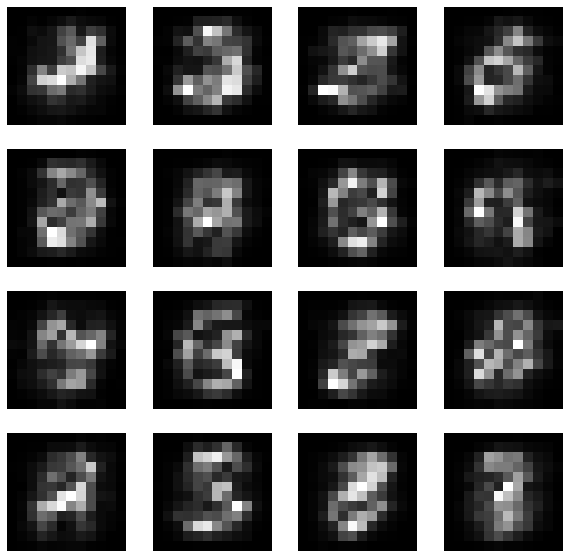

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 351 - val_loss=37271.5166015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 352 - val_loss=37408.6396484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 353 - val_loss=36877.6376953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 354 - val_loss=36682.6044921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 355 - val_loss=37136.6669921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 356 - val_loss=37288.884765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 357 - val_loss=36912.9775390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 358 - val_loss=37174.7900390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 359 - val_loss=36873.955078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 360 - val_loss=36460.5810546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 361 - val_loss=36618.3681640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 362 - val_loss=37176.185546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 363 - val_loss=37913.3271484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 364 - val_loss=37011.9619140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 365 - val_loss=36764.6767578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 366 - val_loss=36700.9638671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 367 - val_loss=37107.1396484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 368 - val_loss=37055.5625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 369 - val_loss=39343.197265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 370 - val_loss=37650.244140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 371 - val_loss=36685.4169921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 372 - val_loss=37837.2080078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 373 - val_loss=37037.6806640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 374 - val_loss=36606.3759765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 375 - val_loss=37925.4912109375


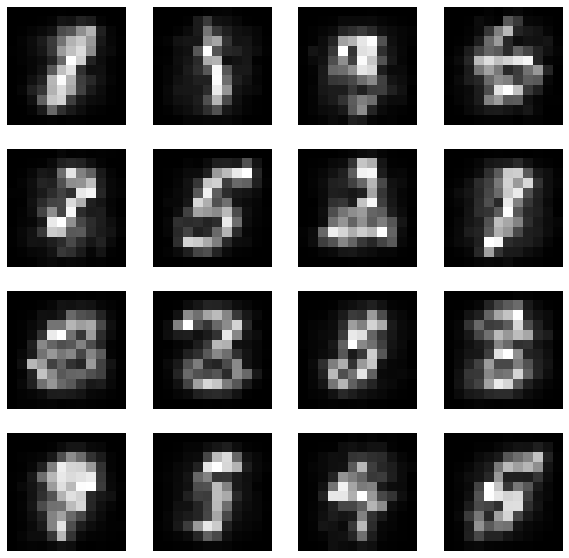

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 376 - val_loss=36889.798828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 377 - val_loss=37615.900390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 378 - val_loss=36791.2587890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 379 - val_loss=36592.158203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 380 - val_loss=36751.787109375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 381 - val_loss=37181.5986328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 382 - val_loss=36942.5068359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 383 - val_loss=36809.986328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 384 - val_loss=36350.90625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 385 - val_loss=36915.7119140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 386 - val_loss=36384.0009765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 387 - val_loss=36727.45703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 388 - val_loss=37635.68359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 389 - val_loss=36750.2314453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 390 - val_loss=36892.2568359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 391 - val_loss=38440.876953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 392 - val_loss=36523.927734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 393 - val_loss=36570.375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 394 - val_loss=36937.5009765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 395 - val_loss=40914.7978515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 396 - val_loss=36691.46875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 397 - val_loss=36460.0302734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 398 - val_loss=37102.115234375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 399 - val_loss=38100.8583984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 400 - val_loss=37102.966796875


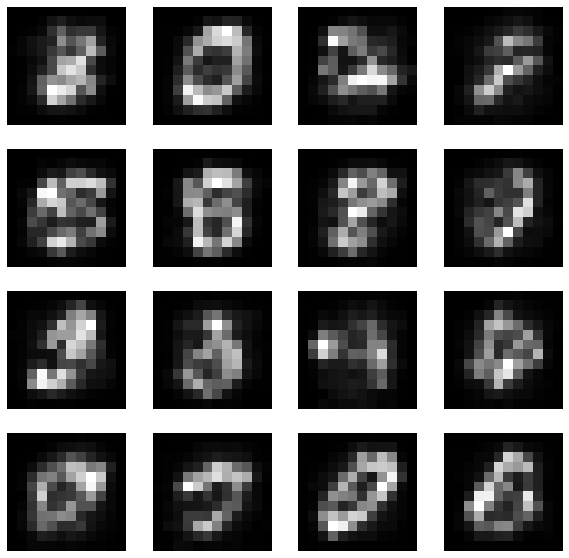

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 401 - val_loss=36793.5634765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 402 - val_loss=37436.2216796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 403 - val_loss=36723.3076171875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 404 - val_loss=36810.8447265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 405 - val_loss=36986.1171875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 406 - val_loss=36456.1337890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 407 - val_loss=37006.6416015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 408 - val_loss=36834.3955078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 409 - val_loss=36338.900390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 410 - val_loss=36597.9833984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 411 - val_loss=36546.7529296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 412 - val_loss=36763.5810546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 413 - val_loss=36597.228515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 414 - val_loss=37390.955078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 415 - val_loss=36702.3251953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 416 - val_loss=36659.857421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 417 - val_loss=36944.7587890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 418 - val_loss=37795.8330078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 419 - val_loss=37068.4736328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 420 - val_loss=37193.9580078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 421 - val_loss=36716.1982421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 422 - val_loss=37330.640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 423 - val_loss=36750.8720703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 424 - val_loss=36652.8134765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 425 - val_loss=36541.5244140625


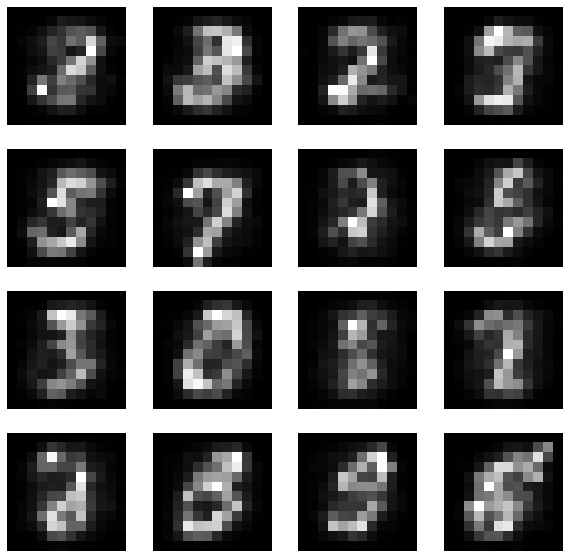

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 426 - val_loss=36854.5966796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 427 - val_loss=36800.0087890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 428 - val_loss=36545.8564453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 429 - val_loss=36856.7314453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 430 - val_loss=36831.505859375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 431 - val_loss=37589.6171875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 432 - val_loss=36880.8994140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 433 - val_loss=36519.6298828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 434 - val_loss=36483.662109375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 435 - val_loss=36777.3310546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 436 - val_loss=38214.3037109375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 437 - val_loss=36441.658203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 438 - val_loss=36329.7001953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 439 - val_loss=36301.7158203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 440 - val_loss=36428.46875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 441 - val_loss=36758.8623046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 442 - val_loss=36374.97265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 443 - val_loss=37582.17578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 444 - val_loss=36377.7705078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 445 - val_loss=36400.8046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 446 - val_loss=36235.8388671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 447 - val_loss=37263.9462890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 448 - val_loss=36846.51171875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 449 - val_loss=36567.9853515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 450 - val_loss=38258.30078125


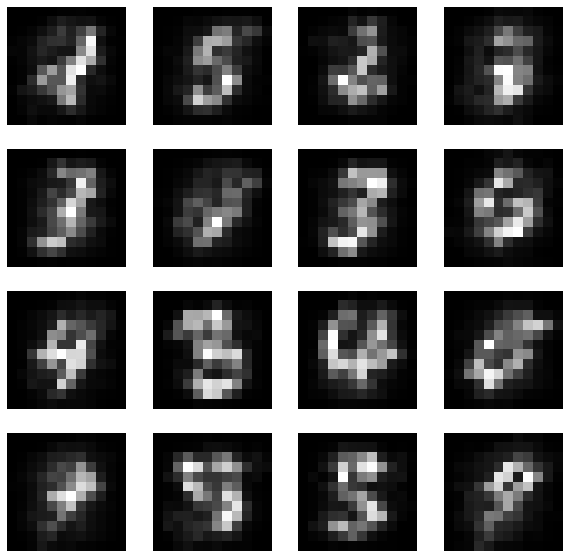

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 451 - val_loss=36973.3798828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 452 - val_loss=36655.642578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 453 - val_loss=36683.03515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 454 - val_loss=36759.7978515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 455 - val_loss=36504.1767578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 456 - val_loss=36479.408203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 457 - val_loss=36665.3388671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 458 - val_loss=38404.037109375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 459 - val_loss=38840.7841796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 460 - val_loss=36823.8369140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 461 - val_loss=39462.2294921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 462 - val_loss=36963.0966796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 463 - val_loss=36307.2626953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 464 - val_loss=36553.19921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 465 - val_loss=36658.630859375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 466 - val_loss=36660.0634765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 467 - val_loss=36730.6396484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 468 - val_loss=36822.7421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 469 - val_loss=36520.552734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 470 - val_loss=36467.048828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 471 - val_loss=36549.625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 472 - val_loss=36329.99609375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 473 - val_loss=35981.3046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 474 - val_loss=36484.1357421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 475 - val_loss=36331.4931640625


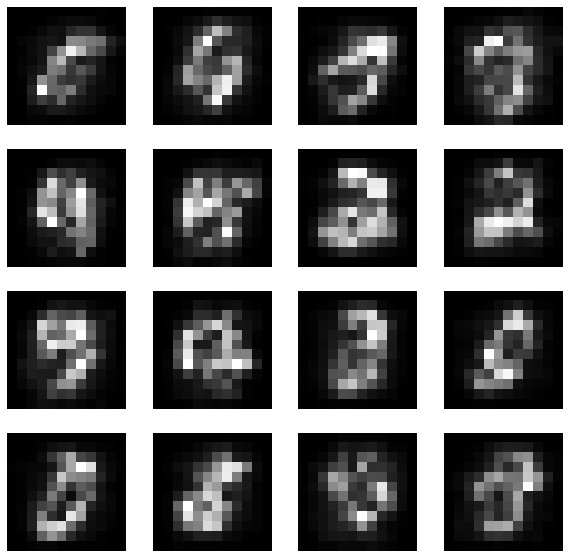

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 476 - val_loss=37914.9384765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 477 - val_loss=36130.2431640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 478 - val_loss=36467.052734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 479 - val_loss=36379.8935546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 480 - val_loss=36441.458984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 481 - val_loss=36648.6552734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 482 - val_loss=36482.2900390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 483 - val_loss=36157.1083984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 484 - val_loss=36336.740234375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 485 - val_loss=36399.4853515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 486 - val_loss=36330.9462890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 487 - val_loss=37303.541015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 488 - val_loss=36278.2255859375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 489 - val_loss=36418.1162109375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 490 - val_loss=36142.1123046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 491 - val_loss=36556.703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 492 - val_loss=37594.0302734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 493 - val_loss=36974.013671875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 494 - val_loss=36913.587890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 495 - val_loss=36730.8271484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 496 - val_loss=36129.8408203125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 497 - val_loss=36322.3720703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 498 - val_loss=36316.3525390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 499 - val_loss=37092.0107421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 500 - val_loss=36344.3173828125


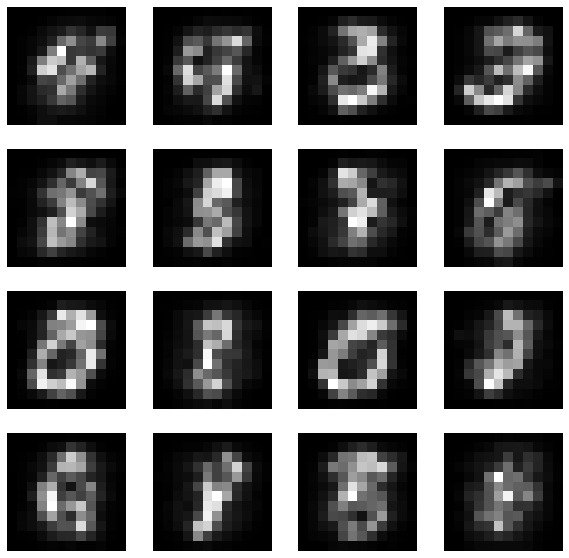

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 501 - val_loss=36595.9208984375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 502 - val_loss=36988.623046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 503 - val_loss=36230.2685546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 504 - val_loss=35997.8935546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 505 - val_loss=36150.3125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 506 - val_loss=36939.4130859375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 507 - val_loss=36497.15625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 508 - val_loss=36102.43359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 509 - val_loss=36478.0185546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 510 - val_loss=36358.0478515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 511 - val_loss=38083.7275390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 512 - val_loss=36225.4453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 513 - val_loss=36893.1142578125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 514 - val_loss=36456.021484375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 515 - val_loss=36357.2919921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 516 - val_loss=36153.1650390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 517 - val_loss=36445.75390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 518 - val_loss=36377.857421875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 519 - val_loss=40165.3095703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 520 - val_loss=36467.0703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 521 - val_loss=36277.6376953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 522 - val_loss=36210.9453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 523 - val_loss=36614.1796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 524 - val_loss=36491.5078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 525 - val_loss=36984.2783203125


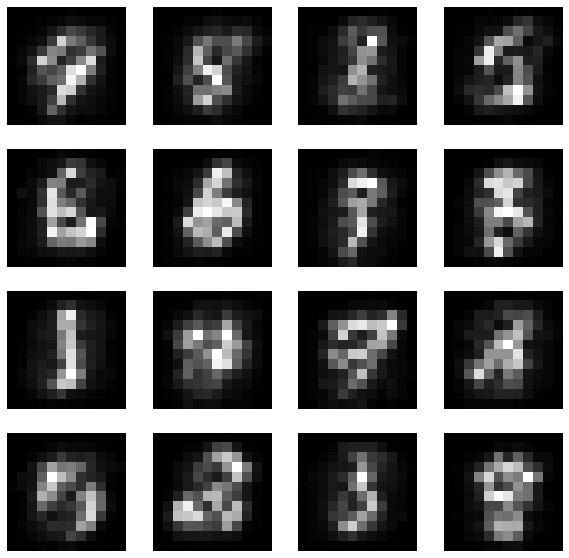

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 526 - val_loss=36918.8486328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 527 - val_loss=36440.794921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 528 - val_loss=36289.650390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 529 - val_loss=36643.51953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 530 - val_loss=36838.9189453125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 531 - val_loss=37084.822265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 532 - val_loss=36254.296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 533 - val_loss=36104.0498046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 534 - val_loss=36529.5576171875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 535 - val_loss=36863.6298828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 536 - val_loss=36324.1884765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 537 - val_loss=36852.744140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 538 - val_loss=36358.3681640625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 539 - val_loss=36535.126953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 540 - val_loss=36830.03515625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 541 - val_loss=36522.5947265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 542 - val_loss=36313.9462890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 543 - val_loss=36556.5390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 544 - val_loss=36788.1279296875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 545 - val_loss=36312.1552734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 546 - val_loss=36388.552734375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 547 - val_loss=37776.6220703125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 548 - val_loss=36880.94921875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 549 - val_loss=36284.8046875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 550 - val_loss=36755.8232421875


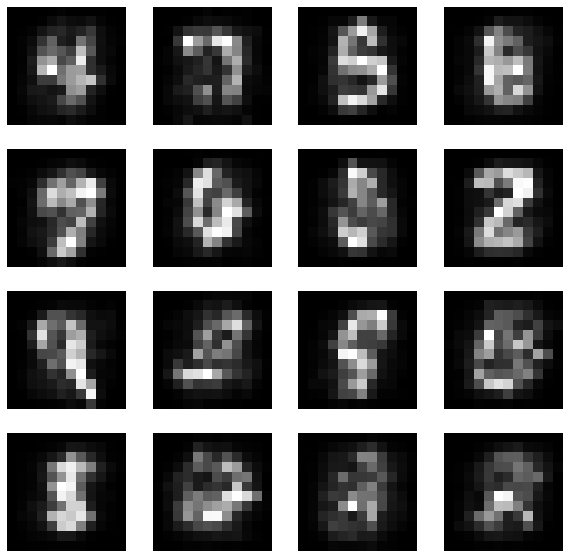

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 551 - val_loss=36230.4775390625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 552 - val_loss=36340.3994140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 553 - val_loss=37582.4501953125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 554 - val_loss=37310.8349609375


In [6]:
results = train_gen_network(os.path.join(result_dir,"diff_e_{}.pt"), model, MAX_PATIENCE, train_loader, val_loader, EPOCH, device, optimizer=optimizer, plot_func=plot_func, plot_img_interval=25)
results = pd.DataFrame(results)

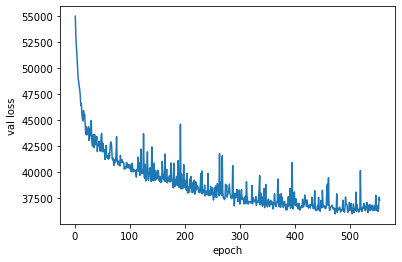

In [7]:
sns.lineplot(x="epoch", y="val loss", data=results)
plt.show()

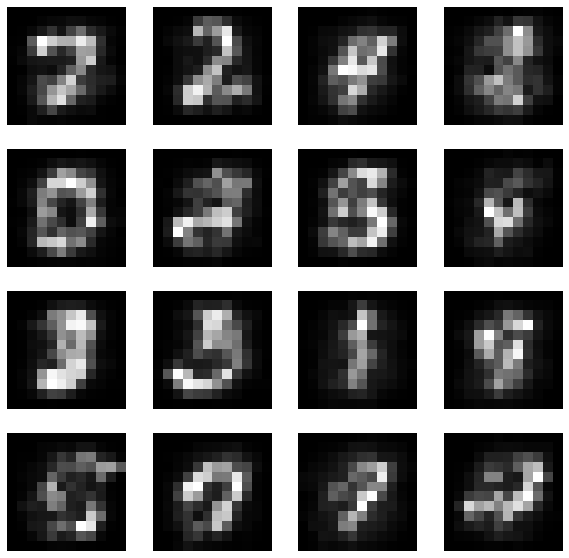

In [18]:
model = torch.load(os.path.join(result_dir, 'diff_e_473.pt'))
## GENERATE THE IMGS

imgs = model.inference(16, device).detach().cpu()
plot_digit_imgs(imgs, IMG_SIZE, (4,4))